# **Red Neuronal Profunda con Keras 2**  


Otro ejemplo de DNN con Keras


## **1 - Paquetes**

Primero, importemos todos los paquetes que necesitarás durante esta asignación.  

- [**numpy**](www.numpy.org) es el paquete fundamental para la computación científica con Python.  
- [**matplotlib**](http://matplotlib.org) es una biblioteca para graficar en Python.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



## **2 - Conjunto de Datos**  

Loads the CIFAR10 dataset.

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. See more info at the [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).

The classes are:



| Label | Description |
|-------|-------------|
| 0     | airplane    |
| 1     | automobile  |
| 2     | bird        |
| 3     | cat         |
| 4     | deer        |
| 5     | dog         |
| 6     | frog        |
| 7     | horse       |
| 8     | ship        |
| 9     | truck       |

In [2]:

import keras
from keras.utils import to_categorical

(x_train, y_train_0), (x_test, y_test_0) = keras.datasets.cifar10.load_data()

# Normalizar las imágenes (valores entre 0 y 1)
x_train_train = x_train.astype('float32') / 255.0
x_train_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a one-hot encoding
y_train = to_categorical(y_train_0, 10)
y_test = to_categorical(y_test_0, 10)



El siguiente código mostrará una imagen del conjunto de datos. Siéntete libre de cambiar el índice y volver a ejecutar la celda varias veces para ver otras imágenes. 

y = [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
y = 9


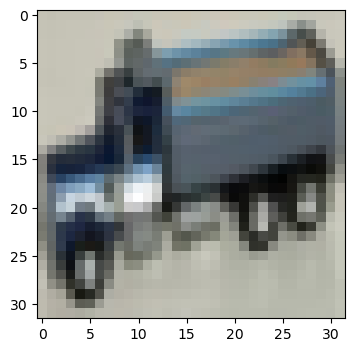

In [3]:

# Ejemplo
index = 340
plt.imshow(x_train[index])
print ("y = " + str(y_train[index,:]) )
print ("y = " + str(y_train_0[index,0]) )

In [4]:
# Explorar el dataset
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_y shape: " + str(y_train.shape))
print ("test_y shape: " + str(y_test.shape))

Number of training examples: 50000
Number of testing examples: 10000
Each image is of size: (32, 32, 3)
train_y shape: (50000, 10)
test_y shape: (10000, 10)


## **3 - Arquitectura del modelo**


---

**3.1 - Red Neuronal de 3 Capas**

El modelo se resume como:  
***ENTRADA -> LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOIDE -> SALIDA***. </center></caption>


In [5]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Input
from keras.optimizers import Adam,SGD
import time



# Crear el modelo
modelo = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(512, activation='relu'),     # Capa oculta con 512 neuronas
    Dense(256, activation='relu'),     # Capa oculta con 256 neuronas
    Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (una por clase)
])

# Compilar el modelo
modelo.compile(optimizer=SGD(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
epochs = 100

start_time = time.time()
historia = modelo.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")
    
#Evaluacion
train_loss, train_acc = modelo.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0998 - loss: 14.4862 - val_accuracy: 0.1001 - val_loss: 14.5007
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1032 - loss: 14.4399 - val_accuracy: 0.1085 - val_loss: 14.3445
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1222 - loss: 14.1058 - val_accuracy: 0.1276 - val_loss: 14.0363
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1311 - loss: 13.9632 - val_accuracy: 0.1213 - val_loss: 14.1397
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1321 - loss: 13.9463 - val_accuracy: 0.1322 - val_loss: 13.9516
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1367 - loss: 13.8844 - val_accuracy: 0.1629 - val_loss: 13.4208
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1543 - loss: 13.5430 - val_accuracy: 0.1705 - val_loss: 13.2672
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.1603 - l

In [1]:
plt.plot(historia.history['loss'][2:],label='training loss')
plt.plot(historia.history['val_loss'][2:],label='validation loss')

NameError: name 'plt' is not defined

In [8]:
print(modelo.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,276 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (8.00 B)

None


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


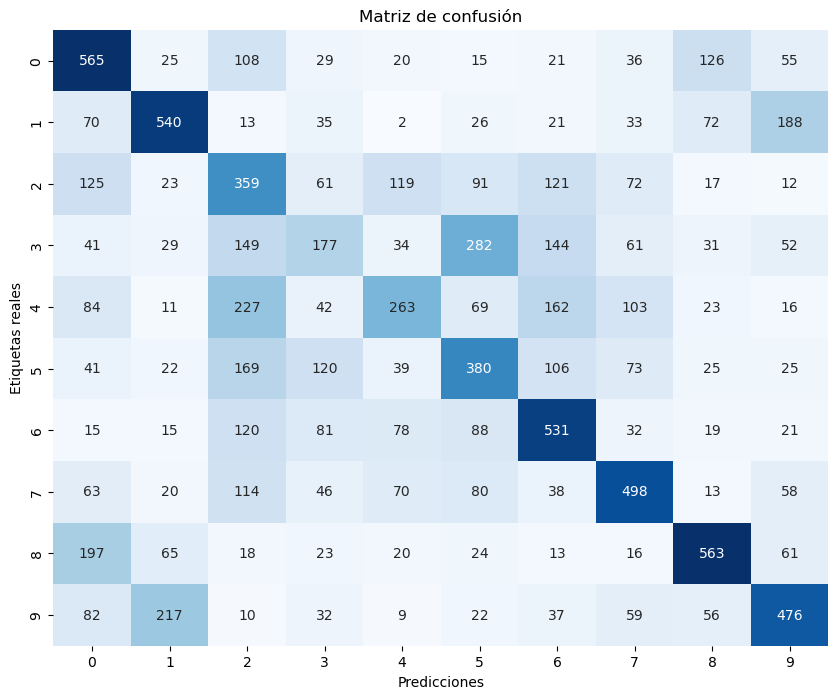

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = modelo.predict(x_test)
y_pred_clases = np.argmax(y_pred, axis=1)

matriz_confusion = confusion_matrix(y_test_0, y_pred_clases)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
                               

from keras.models import Sequential
from keras.layers import Dense, Flatten,Input
from keras.optimizers import Adam
from keras.regularizers import l2
import time

# Crear el modelo
modelo2 = Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(512, activation='relu',kernel_regularizer=l2(0.1)),     # Capa oculta con 512 neuronas
    Dense(256, activation='relu',kernel_regularizer=l2(0.1)),     # Capa oculta con 256 neuronas
    Dense(10, activation='softmax')    # Capa de salida con 10 neuronas (una por clase)
])

# Compilar el modelo
modelo2.compile(optimizer=SGD(learning_rate=0.0002), loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 100
epochs = 100


start_time = time.time()
historia2 = modelo2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))
end_time = time.time()
print(f"Tiempo de entrenamiento: {end_time - start_time} segundos")
    
#Evaluacion
train_loss, train_acc = modelo2.evaluate(x_train, y_train, verbose=0)
test_loss, test_acc = modelo2.evaluate(x_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")                                 

SyntaxError: positional argument follows keyword argument (3151705673.py, line 11)

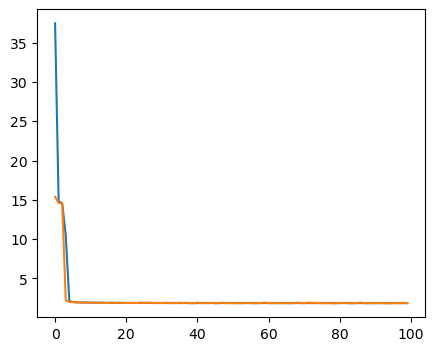

In [11]:
plt.plot(historia.history['loss'],label='training loss')
plt.plot(historia.history['val_loss'],label='validation loss')

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step


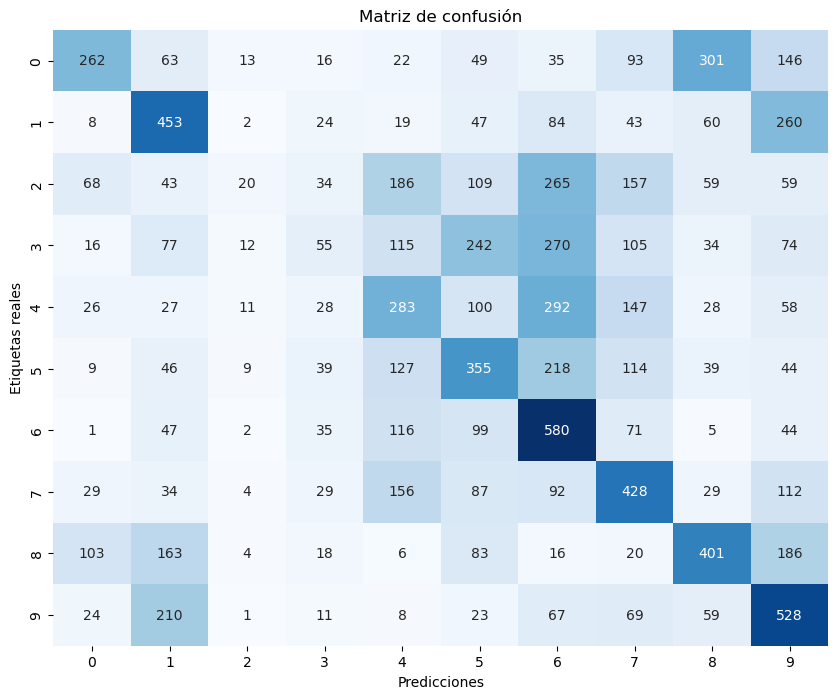

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = modelo.predict(x_test)
y_pred_clases = np.argmax(y_pred, axis=1)

matriz_confusion = confusion_matrix(y_test_0, y_pred_clases)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas reales')
plt.title('Matriz de confusión')
plt.show()